In [6]:
370/440

0.8409090909090909

In [14]:
import json
ProPath = "/home/qxy/Desktop/datasets/VOC2012/data_annotation/val_list.json"
def _loc2IoU(cor_gt,cor_gen):
    '''
    function:计算预测bbox和真实bbox之间的IoU
    input: cor_gt,真实坐标，cor_gen预测坐标: [x0,y0,x1,y1]
    '''
    w = min(cor_gt[2],cor_gen[2])-max(cor_gt[0],cor_gen[0])
    if w <= 0 :
        return 0 #the condition which two bbox dont intersect
    h = min(cor_gt[3],cor_gen[3])-max(cor_gt[1],cor_gen[1])
    if h<= 0 :
        return 0
    cross = w*h
    square_2bbox = (cor_gt[2]-cor_gt[0])*(cor_gt[3]-cor_gt[1])+(cor_gen[2]-cor_gen[0])*(cor_gen[3]-cor_gen[1])
    IoU = float(cross)/float((square_2bbox-cross))
    return IoU

def caliou(cor_gen,cor_gt_list):
    cor = cor_gen[0]
    iou = 0
    for cor_gt in cor_gt_list:
        iou_tmp = _loc2IoU(cor_gt,cor)
        iou = max(iou,iou_tmp)
    return iou

ct = 0
length = 0
with open(ProPath,'r') as f:
    ProLine = json.load(f)
    length = len(ProLine)
    for pro in ProLine:
        cor_gen = pro["pbbox"]
        cor_gt_list = pro["bbox"]
        iou = caliou(cor_gen,cor_gt_list)
        if iou>0.5: ct+=1
print(ct,' ',length,' ',ct/length)

4177   5823   0.7173278378842521


### 制作伪标签数据集 (Psy-VOC)

In [26]:
import json
PsuPath1  = "/home/qxy/Desktop/g2amma/results/VOC_MOVE_train_.json"
ProPath1  = "/home/qxy/Desktop/datasets/VOC2012/data_annotation/train_list.json"
SavePath1 =  "/home/qxy/Desktop/g2amma/results/VOC12_MOVE_train_list.json"

PsuPath  = PsuPath1
ProPath  = ProPath1
SavePath =  SavePath1

with open(ProPath,'r') as f:
    ProList = json.load(f)
with open(PsuPath,'r') as f:
    PsuList = json.load(f)

def make_pro_dict(ProLis,PsuLis):
    No = ProLis["No"]
    name = ProLis["name"]
    bbox = ProLis["bbox"]
    pbbox = PsuLis["predict"]
    for i in range(4):
        pbbox[0][i] = int(pbbox[0][i]/2)
    size = ProLis["size"]
    path = ProLis["path"]
    ProDict = {"No":No,"name":name,"bbox":bbox,"pbbox":pbbox,"size":size,"path":path}
    return ProDict

length = len(ProList)
with open(SavePath,'w+') as f:
    f.write('[\n')
    for idx in range(length):
        ProDict = make_pro_dict(ProList[idx],PsuList[idx])
        json.dump(ProDict,f)
        f.write(',\n')
    f.write(']')

### 对area比值的记录

In [16]:
import json
PsuRealPath = "/home/qxy/Desktop/datasets/CUB/data_annotation/Psy_train_list.json"
SavePath = "/home/qxy/Desktop/g2amma/results/data/282_Ratio.json"
with open(PsuRealPath,'r') as f:
    PsuRealList = json.load(f)

n = len(PsuRealList)
AreaDict = [{} for x in range(n)]
big,small=0,0
for i in range(n):
    PsuBox = PsuRealList[i]["pbbox"][0]
    RealBox = PsuRealList[i]["bbox"][0]
    psuarea,realarea = CalAreaRatio(PsuBox,RealBox)
    AreaDict[i]["PsuArea"]=psuarea
    AreaDict[i]["ReaArea"]=realarea

with open(SavePath,'w') as f:
    json.dump(AreaDict,f)

In [15]:
def CalAreaRatio(psubox,realbox):
    px0,py0,px1,py1=psubox
    rx0,ry0,rx1,ry1=realbox
    parea = (px1-px0)*(py1-py0)
    rarea = (rx1-rx0)*(ry1-ry0)
    return parea,rarea

In [18]:
with open(SavePath,'r') as f:
    RatioList = json.load(f)
lis=[]
for elem in RatioList:
    lis.append([elem["PsuArea"],elem["ReaArea"]])
    lis.sort(key=lambda x : x[1])

[20174, 10200.0]


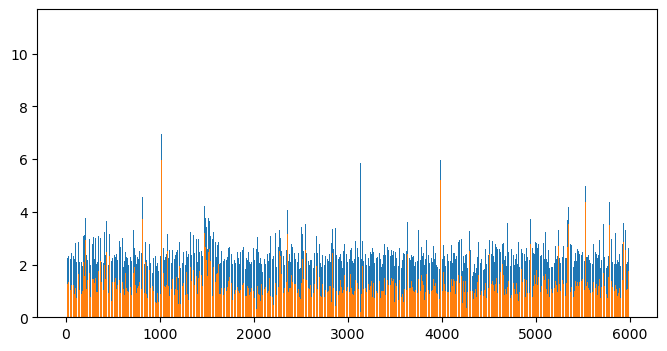

In [22]:
import os 
from matplotlib import pyplot as plt
ReadPath = "/home/qxy/Desktop/g2amma/results/282_Ratio.json"
with open(ReadPath,'r') as f:
    AreaList = json.load(f)
RatioPsu_Real=[]
RatioPre_Psu=[]
x = [i for i in range(len(AreaList))]
for elem in AreaList:
    RatioPsu_Real.append(elem["PsuArea"]/elem["ReaArea"])
    RatioPre_Psu.append(elem["Pre5Area"]/elem["PsuArea"]+RatioPsu_Real[-1])

plt.figure(figsize=(8,4))

plt.bar(x,RatioPre_Psu,label="PrePsu",align="center")
plt.bar(x,RatioPsu_Real,label="PsuReal",align="center")
plt.show()

In [12]:
ReadPath = "/home/qxy/Desktop/g2amma/results/282_RatioPredict.json"
with open(ReadPath,'r') as f:
    PsuRealList = json.load(f)

big,small=0,0
for i in range(len(PsuRealList)):
    if PsuRealList[i]>1.2: big+=1
    if PsuRealList[i]<0.83: small+=1
print("big: ",big)
print("small: ",small)

big:  189
small:  2623


In [8]:
450-2687
490-2146
189-2623

{'No': 2, 'name': 'Black_Footed_Albatross_0009_34', 'bbox': [[139.0, 30.0, 292.0, 294.0]], 'pbbox': [[118, 24, 321, 282]], 'size': [[500, 336]], 'path': '001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'}


In [14]:
ReadPath = "/home/qxy/Desktop/g2amma/results/data/PsuRealRatio.json"
with open(ReadPath,'r') as f:
    PsuRealList = json.load(f)

big,small=0,0
for i in range(len(PsuRealList)):
    if PsuRealList[str(i)]>1.2: big+=1
    if PsuRealList[str(i)]<0.83: small+=1
print("big: ",big)
print("small: ",small)

big:  2552
small:  850


## IoU Visualization

定义一个类IoUPloter,该类的初始化方法是从.json文件汇总读取字典;

IoUPloter 中存在一个方法IoUSorted,该方法将字典转化为排好序的二维列表.
tmplist格式:[[IoU,idx],...,[IoU,idx]]/.

也存在另一个方法IoUSortFromSelf(),将传入的字典按照排好序的二维列表中的idx进行重排,IoUSortFromSelf必须在IoUSorted之后执行.

存在另一个方法Plot,将二维列表一根一根的打印出来.

In [19]:
import json
PredictPath = "/home/qxy/Desktop/g2amma/results/282_20_predict.json"
PseudoPath = "/home/qxy/Desktop/datasets/CUB/data_annotation/Psy_train_list.json"
SavePath = "/home/qxy/Desktop/g2amma/results/data/PsuPreIoU_20.json"
PsePreDic = {}
with open(PredictPath,'r') as f:
    PredictList = json.load(f)
with open(PseudoPath,'r') as f:
    PseudoList = json.load(f)

n = len(PredictList)
for i in range(n):
    PredictBox = PredictList[i]["predict"][0]
    PseudoBox = PseudoList[i]["pbbox"][0]
    idx = i
    IoU = CalIoU(PredictBox,PseudoBox)
    PsePreDic[idx]=IoU

with open(SavePath,'w') as f:
    json.dump(PsePreDic,f)


In [12]:
import json
ReadPath='/home/qxy/Desktop/datasets/CUB/data_annotation/Psy_train_list.json'
SavevPath = '/home/qxy/Desktop/g2amma/results/data/PsuReaIoU.json'
PsuReaDic={}
with open(ReadPath,'r') as f:
    pro_list = json.load(f)

n = len(pro_list)
for i in range(n):
    pbbox = pro_list[i]["pbbox"][0]
    bbox = pro_list[i]["bbox"][0]
    idx = i
    IoU = CalIoU(pbbox,bbox)
    PsuReaDic[idx]=IoU

print(len(PsuReaDic))
print(PsuReaDic[1])
with open(SavevPath,'w') as f:
    json.dump(PsuReaDic,f)

{'1':0.5, '2':0.7,...,}


5994
0.575


In [1]:
def CalIoU(cor_gt,cor_gen):
    '''
    function:计算预测bbox和真实bbox之间的IoU
    input: cor_gt,真实坐标，cor_gen预测坐标: [x0,y0,x1,y1]
    '''
    w = min(cor_gt[2],cor_gen[2])-max(cor_gt[0],cor_gen[0])
    if w <= 0 :
        return 0 #the condition which two bbox dont intersect
    h = min(cor_gt[3],cor_gen[3])-max(cor_gt[1],cor_gen[1])
    if h<= 0 :
        return 0
    cross = w*h
    square_2bbox = (cor_gt[2]-cor_gt[0])*(cor_gt[3]-cor_gt[1])+(cor_gen[2]-cor_gen[0])*(cor_gen[3]-cor_gen[1])
    IoU = float(cross)/float((square_2bbox-cross))
    return IoU

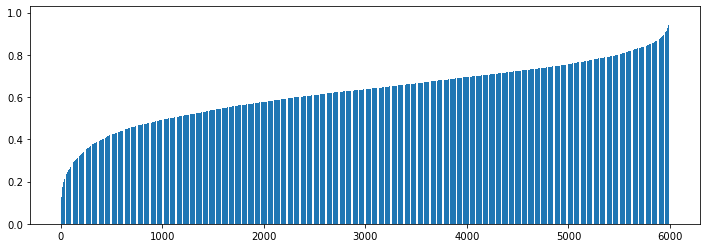

In [15]:
import numpy as np
import matplotlib.pyplot as plt
class IoUPloter():
    def __init__(self,LoadPath):
        with open(LoadPath,'r') as f:
            self.IoUDict = json.load(f)
        self.iousort=[]
        self.idxsort=[]

    def IoUSorted(self):
        tmplist = []
        for keys in self.IoUDict:
            iou,idx = self.IoUDict[keys],int(keys)
            tmplist.append([iou,idx])
        tmplist.sort()
        self.idxsort,self.idxsort = [],[]
        for tmp in tmplist:
            self.idxsort.append(tmp[1])
            self.iousort.append(tmp[0])
    

    def IoUIdxSorted(self,idxlist):
        self.iousort = []
        self.idxsort = []
        for idx in idxlist:
            self.idxsort.append(idx)
            iou = self.IoUDict[str(idx)]
            self.iousort.append(iou)


    def Plot(self):
        n = len(self.iousort)
        if n==0:
            print("Must IoUSorted first")
            return
        y = np.array(self.iousort)
        x = [x for x in range(n)]
        plt.figure(figsize=(12,4))
        plt.bar(x,y)
        plt.show()




loadpath = "/home/qxy/Desktop/g2amma/results/data/PsuReaIoU.json"
ploter = IoUPloter(loadpath)
ploter.IoUSorted()
ploter.Plot()



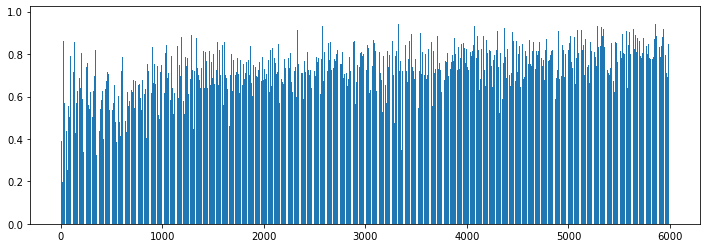

In [26]:
predictpath = "/home/qxy/Desktop/g2amma/results/data/PsuPreIoU_5.json"
PredictPloter = IoUPloter(predictpath)

PredictPloter.IoUIdxSorted(ploter.idxsort)
PredictPloter.Plot()

Text(0, 0.5, 'PsuPredict')

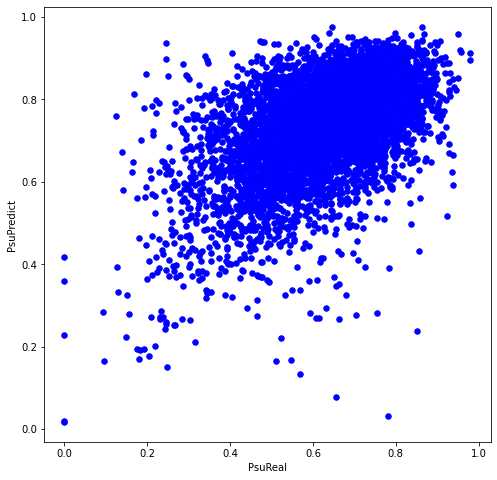

In [27]:
x = np.array(ploter.iousort)
y = np.array(PredictPloter.iousort)
plt.figure(figsize=(8,8))
plt.scatter(x,y,s=30,c='blue',marker='o')

plt.xlabel('PsuReal')
plt.ylabel('PsuPredict')

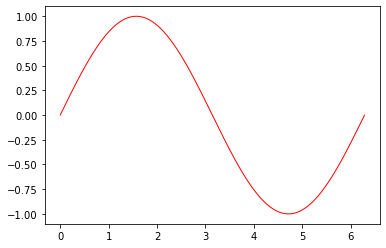

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,2*np.pi,200)
y = np.sin(x)
c = 'red'
lw = 1
fig,ax = plt.subplots()
ax.plot(x,y,c,linewidth=lw)
plt.show()

## VOC2012 Dataset make

In [33]:
import json
import os
from tqdm import tqdm
from PIL import Image
import xml.dom.minidom
class make_property():
    #制作数据集的中图片的各种属性为一个一个list文件
    def __init__(self,name_path,store_path,img_suffix='.jpg',img_prefix = '/JPEGImages'):
        '''proper_path:读取信息的来源
        store_path:保存的路径
        '''
        self.store_path = store_path
        self.name_path = name_path
        self.img_suffix = img_suffix
        self.img_prefix = img_prefix
        self.name_list,self.No_list,self.path_list = [],[],[]
        self.bbox_list,self.size_list = [],[]


    def _make_name_No_path_list(self):
        with open(self.name_path,'r') as name_file:
            name_lines = name_file.readlines()
        for name in name_lines:
            name = name.split('\n')[0]
            self.name_list.append(name)
            paths = os.path.join(self.img_prefix,name+self.img_suffix)[1:]
            self.path_list.append(paths)
        self.No_list = [x for x in range(len(name_lines))]

    def _make_size_bnd_list(self):
        prefix ='/home/qxy/Desktop/datasets/VOC2012/Annotations'
        for name in self.name_list:
            prop_path = os.path.join(prefix,name+'.xml')
            dom = xml.dom.minidom.parse(prop_path)
            root = dom.documentElement
            self.size_list.append(self._make_size(root))
            self.bbox_list.append(self._make_bnd(root))
            
    def _make_size(self,root):
        size = root.getElementsByTagName('size')
        width = size[0].getElementsByTagName('width')
        width = width[0].firstChild.data
        height = size[0].getElementsByTagName('height')
        height = height[0].firstChild.data
        return [int(width),int(height)]

    def _make_bnd(self,root):
        objects = root.getElementsByTagName('object')
        bndlist = []
        for object in objects:
            bnd = object.getElementsByTagName('bndbox')
            xmin = bnd[0].getElementsByTagName('xmin')
            xmin = xmin[0].firstChild.data
            ymin = bnd[0].getElementsByTagName('ymin')
            ymin = ymin[0].firstChild.data
            xmax = bnd[0].getElementsByTagName('xmax')
            xmax = xmax[0].firstChild.data
            ymax = bnd[0].getElementsByTagName('ymax')
            ymax = ymax[0].firstChild.data
            bndlist.append([int(xmin),int(ymin),int(xmax),int(ymax)])
        return bndlist



trainval_savepath = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval.json'
name_file = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval.txt'
maker = make_property(store_path=trainval_savepath,name_path=name_file)
maker._make_name_No_path_list()
print(maker.name_list[0],'\n',maker.path_list[0],'\n',maker.No_list[0],'\n',len(maker.No_list))
maker._make_size_bnd_list()
print(maker.bbox_list[0],'\n',maker.size_list[0],'\n',len(maker.bbox_list))

2008_000002 
 JPEGImages/2008_000002.jpg 
 0 
 11540
[[34, 11, 448, 293]] 
 [500, 375] 
 11540


In [62]:
class JsonMaker():
    #将make_property得到的各种属性的列表整合成一个json文件
    def __init__(self,maker):
        self.name_list = maker.name_list
        self.No_list = maker.No_list 
        self.path_list = maker.path_list
        self.bbox_list = maker.bbox_list
        self.size_list = maker.size_list
        self.store_path = maker.store_path

    def _make_pro_dict(self,idx):
        No = self.No_list[idx]
        name = self.name_list[idx]
        path = self.path_list[idx]
        bbox = self.bbox_list[idx]
        size = self.size_list[idx]
        if len(self.size_list[idx])==2:
            size = [size]
        pro_dict = {"No":No,"name":name,"bbox":bbox,"size":size,"path":path}
        return pro_dict

    def make_property(self):
        length = len(self.name_list)
        with open(self.store_path,'w') as f:
            f.write('[\n')
            #mini trial size
            for idx in tqdm(range(length)):
                pro_dict = self._make_pro_dict(idx)
                json.dump(pro_dict,f)
                f.write(',\n')
            f.write(']')

class JsonPseudoMaker(JsonMaker):
    def __init__(self,maker):
        super(JsonPseudoMaker, self).__init__(maker)
        self.pbbox_list = maker.pbbox_list

    def _make_pro_dict(self, idx):
        No = self.No_list[idx]
        name = self.name_list[idx]
        path = self.path_list[idx]
        bbox = self.bbox_list[idx]
        size = self.size_list[idx]
        pbbox = self.pbbox_list[idx]
        if len(size)==2:
            size = [size]
        if len(pbbox)==4:
            pbbox = [pbbox]
        pro_dict = {"No":No,"name":name,"bbox":bbox,"pbbox":pbbox,"size":size,"path":path}
        return pro_dict

# jmaker = JsonMaker(maker)
# jmaker.make_property()

In [60]:
class json2list():
    def __init__(self,json_path,store_path,name_path):
        ##根据已经生成好的train_val数据集来生成train，val数据集
        self.store_path = store_path
        self.json_path = json_path
        self.name_path = name_path
        self.name_list,self.No_list,self.path_list = [],[],[]
        self.bbox_list,self.size_list = [],[]
        self.pbbox_list = []
    def _json_load(self):
        with open(self.json_path,'r') as f:
            pro_list = json.load(f)
        ct=0
        with open(self.name_path,'r') as name_file:
            name_lines = name_file.readlines()
        for name in name_lines:
            name = name.split('\n')[0]
            while(True):
                if pro_list[ct]['name']==name:
                    self.name_list.append(pro_list[ct]['name'])
                    self.No_list.append(pro_list[ct]['No'])
                    self.path_list.append(pro_list[ct]['path'])
                    self.bbox_list.append(pro_list[ct]['bbox'])
                    self.size_list.append(pro_list[ct]['size'])
                    self.pbbox_list.append(pro_list[ct]['pbbox'])
                    break
                else:
                    ct+=1


json_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval2.json'
store_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/train2.json'
name_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/train.txt'
maker = json2list(json_path,store_path,name_path)
maker._json_load()
print(maker.name_list[0],'\n',maker.path_list[0],'\n',maker.No_list[0],'\n',len(maker.No_list))
print(maker.bbox_list[0],'\n',maker.size_list[0],'\n',len(maker.bbox_list))
jmaker = JsonMaker(maker)
jmaker.make_property()

JSONDecodeError: Expecting value: line 11542 column 1 (char 2230620)

In [57]:
class jsonadd():
    def __init__(self,json_path,pbx_path,store_path):
        ##根据已经生成好的train_val数据集来生成train，val数据集
        self.store_path = store_path
        self.json_path = json_path
        self.pbx_path = pbx_path
        self.name_list,self.No_list,self.path_list = [],[],[]
        self.bbox_list,self.size_list = [],[]
        self.pbbox_list = []

    def _json_load(self):
        #打开主json读取已经做好的主要属性
        with open(self.json_path,'r') as f:
            pro_list = json.load(f)
        #打开pbbox的json读取pseudo bbox list
        with open(self.pbx_path,'r') as f:
            pseudo_list = json.load(f)
        if len(pro_list) != len(pseudo_list):
            raise Exception("unmatch information")
        #从主json中提取属性列表
        for i in range(len(pro_list)):
                self.name_list.append(pro_list[i]['name'])
                self.No_list.append(pro_list[i]['No'])
                self.path_list.append(pro_list[i]['path'])
                self.bbox_list.append(pro_list[i]['bbox'])
                self.size_list.append(pro_list[i]['size'])
        self.pbbox_list = pseudo_list

    def _make_pro_dict(self,idx):
        No = idx + 1
        name = self.name_list[idx]
        path = self.path_list[idx]
        bbox = self.bbox_list[idx]
        size = self.size_list[idx]
        pbbox = self.pbbox_list[idx]
        if len(self.size_list[idx])==2:
            size = [size]
        if len(pbbox) ==4:
            pbbox = [pbbox]
        pro_dict = {"No":No,"name":name,"bbox":bbox,"pbbox":pbbox,"size":size,"path":path}
        return pro_dict

    def make_property(self):
        self._json_load()
        length = len(self.name_list)
        with open(self.store_path,'w') as f:
            f.write('[\n')
            #mini trial size
            for idx in tqdm(range(length)):
                pro_dict = self._make_pro_dict(idx)
                json.dump(pro_dict,f)
                f.write(',\n')
            f.write(']')

json_path =  '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval.json'
pbx_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/pbx_trainval.json'
store_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval2.json'
jadder = jsonadd(json_path,pbx_path,store_path)
#组合需要的属性为一个一个list形式
jadder.make_property()



100%|██████████| 11540/11540 [00:00<00:00, 37740.06it/s]


TypeError: object.__init__() takes exactly one argument (the instance to initialize)

In [64]:
json_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval2.json'
name_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/val.txt'
store_path  = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/val2.json'
maker = json2list(json_path,store_path,name_path)
maker._json_load()
jmaker = JsonPseudoMaker(maker)
jmaker.make_property()

100%|██████████| 5823/5823 [00:00<00:00, 35501.65it/s]


In [5]:
name_file = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval.txt'
with open(name_file,'r') as name_file:
    line = name_file.readlines()
print(len(line))
print(type(line[0]))
prefix = '/home/qxy/Desktop/datasets/VOC2012/data/JPEGImages'
suffix = '.jpg'
import cv2
paths = os.path.join(prefix,line[0].split('\n')[0]+suffix)
print(paths)
img = cv2.imread(paths)
print(img)

11540
<class 'str'>
/home/qxy/Desktop/datasets/VOC2012/data/JPEGImages/2008_000002.jpg
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  1   1   1]
  [  2   2   2]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[  1   1   1]
  [  1   1   1]
  [  2   2   2]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[  1   1   1]
  [  2   2   2]
  [  2   2   2]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]


## Fine-graind dataset make (Aircraft,Dog,Car)

In [32]:
import json
import os
from tqdm import tqdm
from PIL import Image
class make_property():
    def __init__(self,proper_path,store_path,img_suffix='.jpg'):
        '''proper_path:读取信息的来源
        store_path:保存的路径
        '''
        self.proper_path = proper_path
        self.store_path = store_path
        self.property_list = []
        self.class_list ,self.path_list,self.name_list = \
            self._make_property_list(img_suffix)


    def make_property(self):
        length = len(self.class_list)
        with open(self.store_path,'w') as f:
            f.write('[\n')
            #mini trial size
            for idx in tqdm(range(length)):
                pro_dict = self._make_pro_dict(idx)
                json.dump(pro_dict,f)
                f.write(',\n')
            f.write(']')

    def _make_pro_dict(self,idx):
        No = idx + 1
        name = self.name_list[idx]
        clas = self.class_list[idx]
        path = self.path_list[idx]
        pro_dict = {"No":No,"name":name,"class":clas,"path":path}
        return pro_dict

    def _make_property_list(self,img_suffix):
        #idx 从0开始，No从1开始
        class_list , path_list, name_list = \
            [],[],[]
        with open(self.proper_path,'r') as pros:
            f = pros.readlines()
            # if self.length != None:
            #     f = f[:self.length]
            for pro in f:
                path = pro.split(' ')[0]
                clas = int(pro.split(' ')[-1].split('\n')[0])+1
                name  = path.split('/')[-1].split(img_suffix)[0]
                class_list.append(clas)
                path_list.append(path)
                name_list.append(name)
        return class_list,path_list,name_list

class make_test_property(make_property):
    def __init__(self,proper_path,store_path,sizebox_path,length=None):
        self.length=length
        super(make_test_property, self).__init__(proper_path,store_path)
        self.sizebox_path = sizebox_path
        self.size_list ,self.bbox_list = self._make_sizebox_list()

    def _make_sizebox_list(self):
        length = len(self.class_list)
        size_list = []
        bbox_list = []
        with open(self.sizebox_path,'r') as f:
            sizebox_dict = json.load(f)
            for idx in range(length):
                No = idx+1
                size_list.append(sizebox_dict[str(No)]['size'])
                bbox_list.append(sizebox_dict[str(No)]['bbox'])
        return size_list,bbox_list

    def _make_pro_dict(self,idx):
        No = idx+1
        name = self.name_list[idx]
        clas = self.class_list[idx]
        path = self.path_list[idx]
        size = self.size_list[idx]
        bbox = self.bbox_list[idx]
        pro_dict = {"No":No,"name":name,"bbox":bbox,"class":clas,"size":size,"path":path}
        return pro_dict


class Car_train(make_property):

    def _make_pro_dict(self,idx):
        No = idx + 1
        name = self.name_list[idx]
        clas = self.class_list[idx]
        path = self.path_list[idx]
        size = [self.size_list[idx]]
        pro_dict = {"No":No,"name":name,"class":clas,"size":size,"path":path}
        return pro_dict

    def make_size_list(self,root_path):
        length = len(self.class_list)
        size_list = []
        for i in tqdm(range(length)):
            dirpath = self.path_list[i]
            paths = os.path.join(root_path,dirpath)
            size_list.append(list(Image.open(paths).size))
        self.size_list = size_list
        print('size list make done')

class Car_test(Car_train):
    
    
            

In [83]:
%load_ext autoreload
%autoreload 2
from prepared_util import Car_train,Car_test, Car_val
# Car_test_proper = '/home/qxy/Desktop/datasets/Aircraft/else_annotation/test_gt_bbox2.json'
# Car_test_proper2 = '/home/qxy/Desktop/datasets/Aircraft/else_annotation/test_list.txt'
# Car_test_restore = '/home/qxy/Desktop/datasets/Aircraft/data_annotation/test_list.json'
# Root_path = '/home/qxy/Desktop/datasets/Aircraft/data/'
# Car_test = Car_test([Car_test_proper,Car_test_proper2],Car_test_restore)
# Car_test.make_property()

test_path = '/home/qxy/Desktop/datasets/Aircraft/data_annotation/test_list.json'
val_store = '/home/qxy/Desktop/datasets/Aircraft/data_annotation/val_list.json'
length = 500
Car_val(test_path, val_store, length)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import json
read_path = '/home/qxy/Desktop/datasets/Aircraft/data_annotation/test_gt_bbox2.json'
with open(read_path,'r') as f:
    lis = json.load(f)
    print(lis[str(1)])

{'size': [276, 182], 'bbox': [[30, 52, 246, 147]], 'resized_bbox': [[24.347826, 64.0, 199.652174, 180.923077]], 'num_object': 1}


In [79]:
#car_train maker
import json
import os
from tqdm import tqdm
from PIL import Image
Dog_train_proper = '/home/qxy/Desktop/datasets/Aircraft/else_annotation/trainval_list.txt'
Dog_train_restore = '/home/qxy/Desktop/datasets/Aircraft/data_annotation/train_list.json'
Root_path = '/home/qxy/Desktop/datasets/Aircraft/data/'
dog_train = Car_train(Dog_train_proper,Dog_train_restore)
dog_train.make_size_list(Root_path)
dog_train.make_property()

100%|██████████| 6667/6667 [00:00<00:00, 19125.90it/s]


size list make done


100%|██████████| 6667/6667 [00:00<00:00, 77721.95it/s]


## Torch ILSVRC pretrained label mapping

In [11]:
'''
step 1: using json to read 'imagenet_class_index.json'
step 2: create ilsvrc property .jsons only for classification 
, including torch_val_list.json and torch_train_list.json and 
torch_test_json.json
step3: make a class which replace the corresponding class of target class
3.1 make a class2class mapping list, using imagenet_class_index.json and train_list.json
3.2 write a class which traverse whole list and change class of three json 
'''
import json 
from tqdm import tqdm
torch_clas_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/imagenet_class_index.json'
train_list_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'
with open(torch_clas_path,'r') as f:
    torch_clas_corres = json.load(f)

with open(train_list_path,'r') as f:
    ori_train_list = json.load(f)
print(torch_clas_corres['0'])


['n01440764', 'tench']


In [18]:
#def class_mapping(torch_clas_corres,ori_train_list):
'''output: clas_map_list{int:int, int,int}, the fisrt intenger in int couple is 'original class',
the second is torch_pretrained class
'''
import ipdb
cls_old=None
clas_map_dict = {}
for proper in tqdm(ori_train_list):
    clas_id = proper['path'].split('/')[0]
    cls_num = proper['class']
    if clas_id == cls_old:
        continue
    else:
        cls_old = clas_id
        torch_cls_num=None
        for i in range(1000):
            if torch_clas_corres[str(i)][0] == clas_id:
                torch_cls_num=i+1
                break
        if torch_cls_num == None:
            print(clas_id,cls_num)
            raise Exception('cant find correspond clas')
        
        clas_map_dict[cls_num]= torch_cls_num

100%|██████████| 1281167/1281167 [00:00<00:00, 1867967.92it/s]


In [37]:
#define writing function
import prepared_util as utils
def rewrite(torch_path,clas_map_dict):
    record_list = []
    ori_list = []
    with open(torch_path,'r') as f:
        ori_list = json.load(f)
    for proper_piece in ori_list:
        record_piece = replace(proper_piece,clas_map_dict)
        record_list.append(record_piece)
    utils.list2json(record_list,torch_path)

def replace(proper_piece, clas_map_dict):
    clas_num = proper_piece['class']
    torch_clas_num = clas_map_dict[clas_num]
    proper_piece['class'] = torch_clas_num
    return proper_piece


In [38]:
#rewrite class label
torch_train_list_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/torch_train_list.json'
torch_test_list_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/torch_test_list.json'
torch_val_list_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/torch_val_list.json'
rewrite(torch_train_list_path,clas_map_dict)
rewrite(torch_test_list_path,clas_map_dict)
rewrite(torch_val_list_path,clas_map_dict)
    


## ILSVRC embdeeing

### make class sequential

In [1]:

%load_ext autoreload
%autoreload 2

In [21]:
import json
from tqdm import tqdm
import prepared_util as utils
train_list_paths = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'
class_sequential_paths = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/class_sequential.json'
#1.makse class sequential according train_list
#2.make sure that train_list do not class repeated
class_sequential_list = []
with open(train_list_paths,'r') as f:
    train_list = json.load(f)
    above = -1
    now = -1
    for img in tqdm(train_list):
        now = img['path'].split('/')[0]
        if above != now:
            if now in class_sequential_list:
                raise Exception('repeated {}'.format(now))
            class_sequential_list.append(now)
            above = now

utils.list2json(class_sequential_list,class_sequential_paths)
        
# def list2json(lists,json_file_path):
#     with open(json_file_path,'w') as f:
#         f.write('[\n')
#         for element in lists:
#             element = json.dumps(element)
#             f.write(element+',\n')
#         f.write(']')
        




FileNotFoundError: [Errno 2] No such file or directory: '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'

### generate file and child train_list.json

In [15]:
%load_ext autoreload
%autoreload 2
import os
import json
import sys
from tqdm import tqdm
import prepared_util as utils
root_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_data'
class_seq_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/class_sequential.json'
train_list_paths = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'
with open(class_seq_path,'r') as f:
    class_seq_list = json.load(f)

with open(train_list_paths,'r') as f:
    train_list = json.load(f)
#先完成1个数据集的
#建文件夹
idx = 0
for clas in tqdm(class_seq_list):
    # clas = class_seq_list[0]
    clas_dir = os.path.join(root_path,clas)
    os.system('mkdir {}'.format(clas_dir))

    clas_train_list = []
    while idx <len(train_list):
        element = train_list[idx]
        if clas in element['name']:
            clas_train_list.append(element)
            idx+=1
        else:
            break

    clas_train_path = os.path.join(clas_dir,'train_list.json')
    utils.list2json(clas_train_list,clas_train_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 1000/1000 [00:05<00:00, 196.32it/s]


In [20]:
#检查train_list 生成正确：
with open(class_seq_path,'r') as f:
    class_seq_list = json.load(f)

with open(train_list_paths,'r') as f:
    train_list = json.load(f)

ct_toal = len(train_list)
ct_sep = 0
for clas in tqdm(class_seq_list):
    clas_dir = os.path.join(os.path.join(root_path,clas),'train_list.json')
    with open(clas_dir,'r') as f:
        clas_list = json.load(f)
        ct_sep += len(clas_list)

print(ct_toal)
print(ct_sep)

100%|██████████| 1000/1000 [00:00<00:00, 1187.65it/s]

1281167
1281167


### fuse train_list and npy

In [25]:
#fuse train_list
%load_ext autoreload
%autoreload 2
import os
import json
import sys
from tqdm import tqdm
import prepared_util as utils

clas_sequent_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/class_sequential.json'
root_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_data'
train_list_savepath = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'
half_list_savepath = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_half_list.json'
one_ten_list_savepath = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_one_ten_list.json'

with open(clas_sequent_path,'r') as f:
    clas_sequent_list = json.load(f)

train_list = []
train_half_list = []
train_one_ten_list = []

for clas in  tqdm(clas_sequent_list) :
    lis_path = os.path.join(root_path,clas)
    #train_lis_path = os.join(lis_path,'train_list.json')
    train_list_size_path = os.path.join(lis_path,'train_list_size.json')
    train_sort_list_path = os.path.join(lis_path,'train_list_size_sort.json')

    with open(train_list_size_path,'r') as f:
        train_list_size = json.load(f)
        train_list += train_list_size
    with open(train_sort_list_path,'r') as f:
        train_sort_list = json.load(f)
        train_half_list += train_sort_list[:int(0.5*len(train_sort_list))]
        train_one_ten_list += train_sort_list[:int(0.1*len(train_sort_list))]

utils.list2json(train_list, train_list_savepath)
utils.list2json(train_half_list, half_list_savepath)
utils.list2json(train_one_ten_list, one_ten_list_savepath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 1000/1000 [00:08<00:00, 111.94it/s]


In [27]:
#fuse npy
%load_ext autoreload
%autoreload 2
import os
import json
import sys
from tqdm import tqdm
import prepared_util as utils
import numpy as np
clas_sequent_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/class_sequential.json'
root_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_data'
train_npy_savepath = '/home/qxy/Desktop/BigGan/weight_result/embeddings/BigBiGAN_ImageNet_q_z.npy'
half_npy_savepath = '/home/qxy/Desktop/BigGan/weight_result/embeddings/BigBiGAN_ImageNet_half_q_z.npy'
one_ten_npy_savepath = '/home/qxy/Desktop/BigGan/weight_result/embeddings/BigBiGAN_ImageNet_oneten_q_z.npy'

with open(clas_sequent_path,'r') as f:
    clas_sequent_list = json.load(f)

train_npy = []
train_half_npy = []
train_one_ten_npy = []

for clas in  tqdm(clas_sequent_list) :
    lis_path = os.path.join(root_path,clas)
    #train_lis_path = os.join(lis_path,'train_list.json')
    tol_npy_path = os.path.join(lis_path,'tol.npy')
    half_npy_path = os.path.join(lis_path,'half.npy')
    one_ten_npy_path = os.path.join(lis_path,'one_ten.npy')

    tol_npy = np.load(tol_npy_path)
    half_npy = np.load(half_npy_path)
    one_ten_npy = np.load(one_ten_npy_path)

    train_npy.append(tol_npy)
    train_half_npy.append(half_npy)
    train_one_ten_npy.append(one_ten_npy)

np.save(train_npy_savepath,np.vstack(train_npy))
np.save(half_npy_savepath,np.vstack(train_half_npy))
np.save(one_ten_npy_savepath,np.vstack(train_one_ten_npy))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 1000/1000 [00:01<00:00, 655.81it/s]


## make ILSVRC dataset file

In [21]:
import json
import os
from tqdm import tqdm

class make_property():
    def __init__(self,proper_path,store_path):
        self.proper_path = proper_path
        self.store_path = store_path
        self.property_list = []
        self.class_list ,self.path_list,self.name_list = \
            self._make_property_list()

    def make_property(self):
        length = len(self.class_list)
        with open(self.store_path,'w') as f:
            f.write('[\n')
            #mini trial size
            for idx in tqdm(range(length)):
                pro_dict = self._make_pro_dict(idx)
                json.dump(pro_dict,f)
                f.write(',\n')
            f.write(']')

    def _make_pro_dict(self,idx):
        No = idx + 1
        name = self.name_list[idx]
        clas = self.class_list[idx]
        path = self.path_list[idx]
        pro_dict = {"No":No,"name":name,"class":clas,"path":path}
        return pro_dict

    def _make_property_list(self):
        #idx 从0开始，No从1开始
        class_list , path_list, name_list = \
            [],[],[]
        with open(self.proper_path,'r') as pros:
            f = pros.readlines()
            if self.length != None:
                f = f[:self.length]
            for pro in f:
                path = pro.split(' ')[0]
                clas = int(pro.split(' ')[-1].split('\n')[0])+1
                name  = path.split('/')[-1].split('.JPEG')[0]
                class_list.append(clas)
                path_list.append(path)
                name_list.append(name)
        return class_list,path_list,name_list

class make_test_property(make_property):
    def __init__(self,proper_path,store_path,sizebox_path,length=None):
        self.length=length
        super(make_test_property, self).__init__(proper_path,store_path)
        self.sizebox_path = sizebox_path
        self.size_list ,self.bbox_list = self._make_sizebox_list()

    def _make_sizebox_list(self):
        length = len(self.class_list)
        size_list = []
        bbox_list = []
        with open(self.sizebox_path,'r') as f:
            sizebox_dict = json.load(f)
            for idx in range(length):
                No = idx+1
                size_list.append(sizebox_dict[str(No)]['size'])
                bbox_list.append(sizebox_dict[str(No)]['bbox'])
        return size_list,bbox_list

    def _make_pro_dict(self,idx):
        No = idx+1
        name = self.name_list[idx]
        clas = self.class_list[idx]
        path = self.path_list[idx]
        size = self.size_list[idx]
        bbox = self.bbox_list[idx]
        pro_dict = {"No":No,"name":name,"bbox":bbox,"class":clas,"size":size,"path":path}
        return pro_dict

### test_list maker

In [23]:
sizebox_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/val_gt_bbox2.json'
proper_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/val_list.txt'
store_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/test_list.json'
maker = make_test_property(proper_path,store_path,sizebox_path)
maker.make_property()

100%|██████████| 50000/50000 [00:00<00:00, 51446.49it/s]


### train_list maker

In [15]:
import os
# proper_list = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.txt'
# store_list = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'
maker = make_property(proper_list,store_list)
maker.make_property()

100%|██████████| 1281167/1281167 [00:12<00:00, 103802.46it/s]


### val_list maker

In [39]:
class make_valset():
    def __init__(self,read_path,save_path):
        self.read_path = read_path
        self.save_path = save_path


    def read_property(self):
        '''read property from read path
        '''
        with open (self.read_path) as f:
            property_list = json.load(f)
        self.property_list = property_list

    def select_property(self,val_item_list):
        '''select property based on val_item and read path
        '''
        save_list = []
        for i in val_item_list:
            proper = self.property_list[i]
            save_list.append(proper)
        self.save_list = save_list

    def save_property(self):
        '''save property to save_path
        '''
        with open(self.save_path,'w') as f:
            f.write('[\n')
            for i in self.save_list: 
                json.dump(i,f)
                f.write(',\n')
            f.write('\n]')
        print('done')

In [47]:
import numpy as np
test_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/test_list.json'
val_path = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/val_list.json'
maker = make_valset(test_path,val_path)
#生成随即数组，规模为1000
val_item_list = np.sort(np.random.permutation(50000)[:1000])
maker.read_property()
maker.select_property(val_item_list)
maker.save_property()

done


## batch tar

In [3]:
import os
proer_list = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.txt'
store_lsit = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_list.json'
maker = maker_property(proper_list,store_list)
print(len(maker.class_list))


['1.tar', '3.txt', '1', '3.tar', '1.txt', '2.tar', '2.txt']


In [19]:
STORE_DATA_FILE = '/home/qxy/Desktop/datasets/ILSVRC/train_data/try2'
class BATCH_TAR():
    def __init__(self,con_root,dec_root):
        self.file_list = self._list_path_file(con_root)
        self.con_root = con_root
        self.dec_root = dec_root

    def tar_cvf(self):
        for con_name in self.file_list:
            if '.tar' in con_name:
                dec_path = self._dec_path(con_name)
                con_path = os.path.join(self.con_root,con_name)
                os.system('mkdir {}'.format(dec_path))
                os.system('tar -xf {} -C {}'.format(con_path,dec_path))
                print('{}'.format(con_name))

    def _dec_path(self,con_name):
        dec_name = con_name.split('/')[-1].split('.tar')[0]
        dec_path = os.path.join(self.dec_root,dec_name)
        return dec_path

    def _list_path_file(self,path):
        path_list = os.listdir(path)
        return path_list

In [21]:
con_root = ('/home/qxy/Desktop/datasets/ILSVRC/train_data_tar/ILSVRC2012_img_train')
dec_root = ('/home/qxy/Desktop/datasets/ILSVRC/train_data')
taror = BATCH_TAR(con_root,dec_root)
taror.tar_cvf()


n04589890.tar
n04005630.tar
n04192698.tar
n04479046.tar
n01784675.tar
n02105056.tar
n04465501.tar
n02087394.tar
n03160309.tar
n02112706.tar
n07579787.tar
n01917289.tar
n04200800.tar
n02114712.tar
n02090721.tar
n01631663.tar
n02098105.tar
n04239074.tar
n02101388.tar
n03146219.tar
n01774384.tar
n01806567.tar
n04153751.tar
n02444819.tar
n02840245.tar
n09246464.tar
n04040759.tar
n04118538.tar
n02165456.tar
n03658185.tar
n03673027.tar
n02233338.tar
n03998194.tar
n02268443.tar
n02102177.tar
n04398044.tar
n01689811.tar
n03384352.tar
n01955084.tar
n03297495.tar
n04550184.tar
n01910747.tar
n02321529.tar
n04557648.tar
n01807496.tar
n04523525.tar
n04235860.tar
n02641379.tar
n02051845.tar
n01667114.tar
n03424325.tar
n02096585.tar
n01484850.tar
n02025239.tar
n04065272.tar
n02114548.tar
n02091831.tar
n01740131.tar
n02788148.tar
n03467068.tar
n04258138.tar
n02102973.tar
n03495258.tar
n04127249.tar
n02113186.tar
n01773549.tar
n02107908.tar
n02488702.tar
n01665541.tar
n02009912.tar
n02093647.tar
n03089

In [6]:
con_path = '/home/qxy/Desktop/datasets/ILSVRC/train_data/try/3.tar'
dec_path = '/home/qxy/Desktop/datasets/ILSVRC/train_data/try/3'
os.system('mkdir {}'.format(dec_path))
os.system('tar -xf {} -C {}'.format(con_path,dec_path))

0